In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras

# Load CIFAR-10 Dataset

In [ ]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)


print("Training:", x_train.shape,y_train.shape)
print("Validation:", x_val.shape,y_val.shape)
print("Test:", x_test.shape,y_test.shape)



# y_train = np.eye(10)[y_train]
# y_val = np.eye(10)[y_val]
# y_test = np.eye(10)[y_test]

170498071/170498071 [==============================] - 4s 0us/step
Training: (45000, 32, 32, 3) (45000, 1)
Validation: (5000, 32, 32, 3) (5000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train.min(),x_train.max()

(0, 255)

# Show sample CIFAR-10 Images

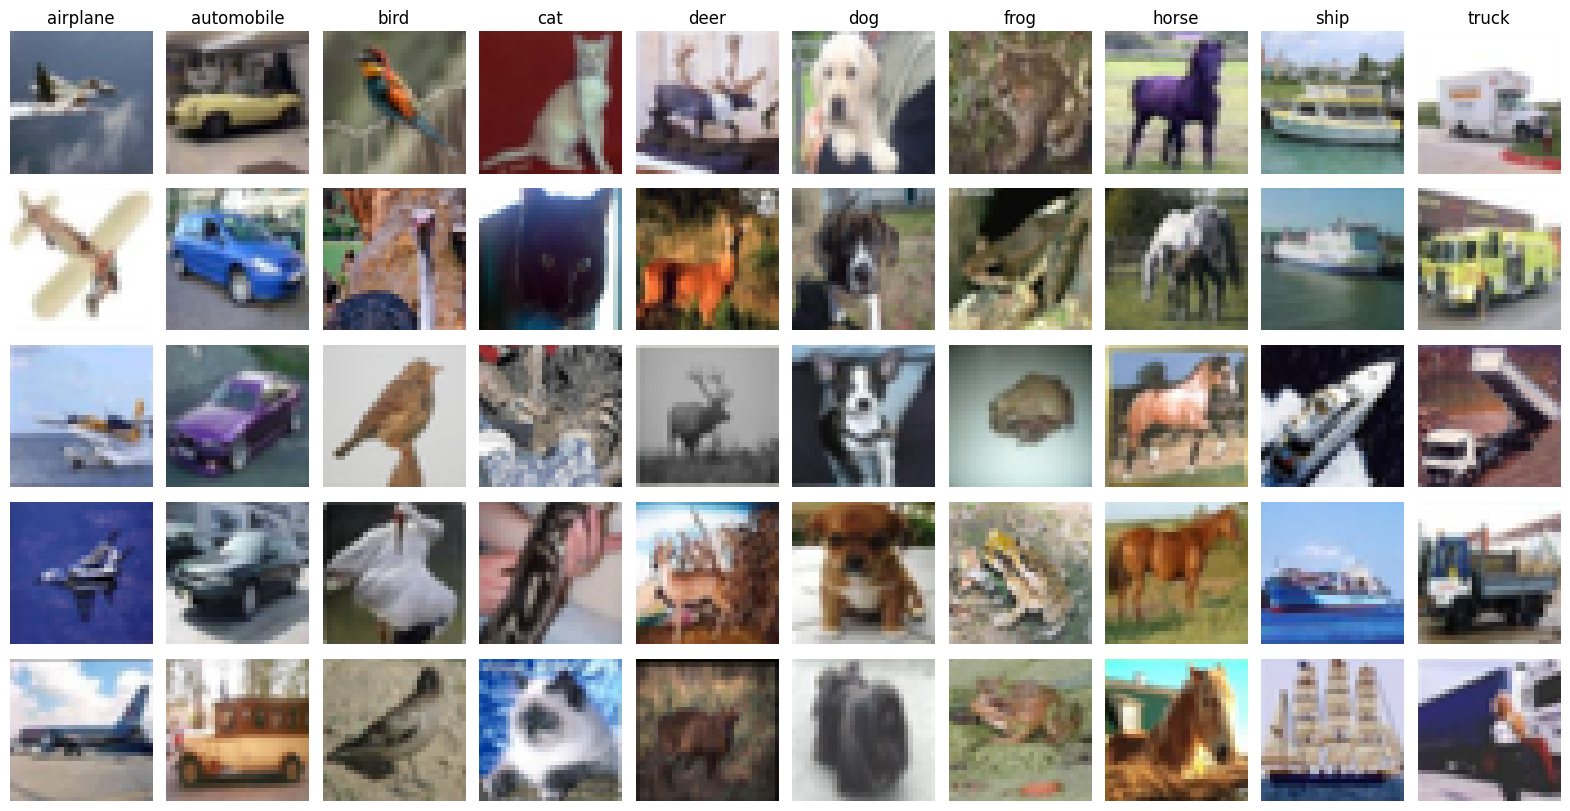

In [ ]:
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize a figure
fig, axarr = plt.subplots(5, 10, figsize=(20, 10))

# Iterate through each class
for class_index in range(10):
    # Find the indices of images with the current class
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 5 samples
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    # Plot each sample in a column
    for i, idx in enumerate(random_indices):
        axarr[i, class_index].imshow(x_train[idx])
        if i==0: axarr[i, class_index].set_title(class_names[class_index])
        axarr[i, class_index].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Load Different Layers and Create the Model

In [ ]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Flatten, Rescaling, Dense

# Create a Sequential model
model = Sequential()

# Flatten and Rescale the input data
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Rescaling(scale=1.0/255, offset=0.0))

# Add Fully Connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))


# Compiling the Model

In [ ]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy # equivalent to "categorical_crossentropy" without requiring one-hot encoded labels
# from keras.metrics import CategroicalAccuracy

model.compile(optimizer=Adam(learning_rate=0.001),loss=sparse_categorical_crossentropy,metrics=["accuracy"])


# Train the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_val,y_val),verbose=1)
                  #  callbacks=[checkpoint, reduce_lr, early_stop], verbose=1)

Epoch 1/50
352/352 [==============================] - 8s 7ms/step - loss: 1.8937 - accuracy: 0.3163 - val_loss: 1.7371 - val_accuracy: 0.3764
Epoch 2/50
352/352 [==============================] - 1s 4ms/step - loss: 1.7008 - accuracy: 0.3904 - val_loss: 1.7073 - val_accuracy: 0.3910
Epoch 3/50
352/352 [==============================] - 1s 4ms/step - loss: 1.6157 - accuracy: 0.4222 - val_loss: 1.5707 - val_accuracy: 0.4380
Epoch 4/50
352/352 [==============================] - 1s 4ms/step - loss: 1.5468 - accuracy: 0.4452 - val_loss: 1.5309 - val_accuracy: 0.4528
Epoch 5/50
352/352 [==============================] - 1s 4ms/step - loss: 1.4990 - accuracy: 0.4650 - val_loss: 1.5071 - val_accuracy: 0.4596
Epoch 6/50
352/352 [==============================] - 2s 5ms/step - loss: 1.4627 - accuracy: 0.4748 - val_loss: 1.4554 - val_accuracy: 0.4842
Epoch 7/50
352/352 [==============================] - 2s 5ms/step - loss: 1.4315 - accuracy: 0.4870 - val_loss: 1.4337 - val_accuracy: 0.4980
Epoch 

# Plot Learning Curve

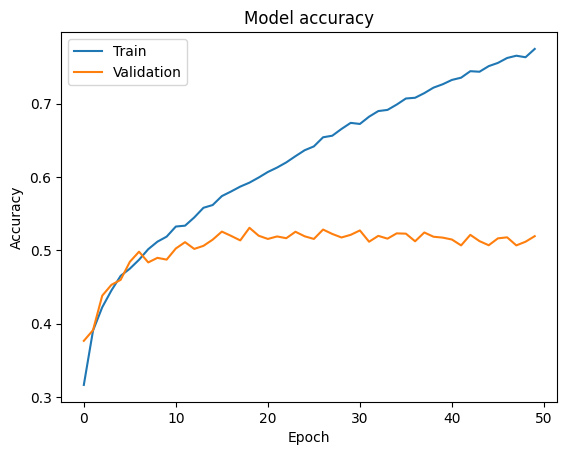

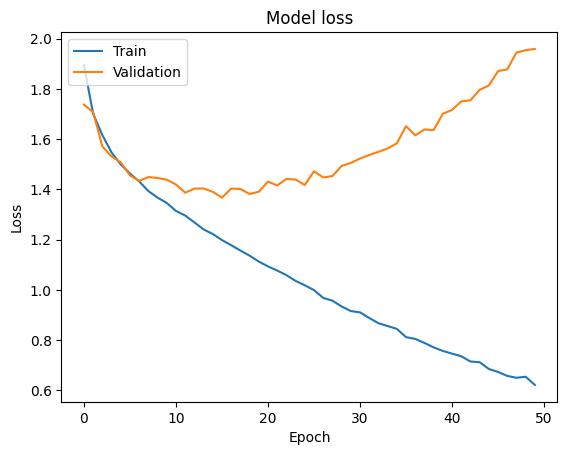

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluating the model

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 2.0016 - accuracy: 0.5058
Test Loss: 2.0015552043914795
Test Accuracy: 0.5058000087738037


# further evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.60      0.60      0.60      1000
           2       0.44      0.30      0.35      1000
           3       0.33      0.35      0.34      1000
           4       0.40      0.51      0.45      1000
           5       0.42      0.45      0.43      1000
           6       0.53      0.54      0.54      1000
           7       0.61      0.57      0.59      1000
           8       0.64      0.61      0.62      1000
           9       0.57      0.55      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

[[592  41  34  32  69  38  20  18 106  50]
 [ 62 598  15  25  21  24  16  18  54 167]
 [ 85  20 297 118 189  94 100  56  23  18]
 [ 31  21  61 352  92 207 114  61  32  29]
 [ 48  14  97 

# saving model

In [ ]:
# model.save('CIFAR10_Model.keras') #saving model to a .h5 file

#loading previously saved model (if necessary)

In [ ]:
# from keras.models import load_model
# model = load_model('CIFAR10_Model.keras') #load model from a .keras file